# - ENETENDER O PROBLEMA

-- Objetivo do Problema:

    -- 1.0. Previsão do primeiro destino que um novo usuário irá escolher.
    
    -- Porque?
    
        -- Qual o tipo de modelo de negócio do Airbnb?
        
            -- Marketplace(Conectar pesoas que oferecem acomodações, com pessoas que estão procurando acomaodações)
            
            -- Oferta (Pessoas oferecendo acomodação)
            
                -- Tamanho do portifólio.
                
                -- Diversidade/Densidade de portifólio.
                
                -- Preço Médio.
                
            -- Demanda (Pessoas procurando acomodação)
            
                -- Número de Usuários.
                
                -- LTV (Lifetime Volue)
                
                -- CAC (Client Acquisition Cost)
                
                
               Gross Revenue = (Free * Número Cliente) - CAC
                

-- Proposta da Solução:

    -- Modelo de previsão do primeiro destino de um novo usuário.
    
    -- 1.0 Predições e salvar em tabela do banco de dados.
    
    -- 2.0 API.
    
        -- Input: Usuário e suas caracteristicas.
        
        -- Output: Usário e suas caracteristicas com a **predição do destino**
        

# 0.0 IMPORTS

In [64]:
import pandas as pd
import random

from sklearn import model_selection as ms
from keras import models as ml
from keras import layers as l
from sklearn import preprocessing as pp
from sklearn import metrics as m 
from scikitplot import metrics as mt

## 0.1 Helper Functions

## 0.2 Loading Data

In [65]:
df_raw = pd.read_csv('Datasets/train_users_2.csv', low_memory=True)
df_raw.shape

(213451, 16)

In [66]:
# df_sessions = pd.read_csv('Dataset2/sessions.csv', low_memory=True)
# df_sessions.shape

# 1.0 DATA DESCRIPTION

In [67]:
df1 = df_raw.copy()

In [68]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of columns: 16


## 1.1 Data type

In [69]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2 NA Check

In [70]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [71]:
# remove missing value completly
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.3 Change Data Type

In [72]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [73]:
# date_account_created 
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype(int)

In [74]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.4 Chack Balanced Data

In [75]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0 DATA FILTERING

In [76]:
df2 =  df1.copy()

## 2.1 Filterting Rows

## 2.2 Columns Selection

# 3.0 DATA PREPARATION

In [77]:
df3 = df2.copy()

In [78]:
# dummy variable
df3_dummy = pd.get_dummies(df3.drop(['id', 'country_destination'], axis=1))

# join id and country_destination
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1)

# 4.0 FEATURE SELECTION

In [79]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] # original dates
df4 = df3.drop(cols_drop, axis=1)

In [80]:
# train
X = df4.drop('country_destination', axis=1)
y = df4['country_destination'].copy()

In [81]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=32)

# 5.0 MACHINE LEARNING MODEL 

In [82]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

## 5.1 Baseline Model

In [83]:
country_destination_list = df1['country_destination'].drop_duplicates().sort_values().tolist()

k_num = y_test.shape[0]

country_destination_weights = df1['country_destination'].value_counts(normalize=True).sort_index().tolist()

yhat_random = random.choices(population=country_destination_list, 
                             weights=country_destination_weights, 
                             k=k_num)
len(yhat_random)

13635

Accuracy: 0.516098276494316
Balanced Accuracy: 0.08742285427041495
kappa Score: -0.002684544235184605
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.02      0.02      0.02       214
          DE       0.01      0.01      0.01       170
          ES       0.01      0.01      0.01       345
          FR       0.04      0.04      0.04       710
          GB       0.02      0.02      0.02       344
          IT       0.03      0.03      0.03       423
          NL       0.03      0.02      0.03       128
          PT       0.00      0.00      0.00        36
          US       0.71      0.71      0.71      9624
       other       0.11      0.10      0.11      1540

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



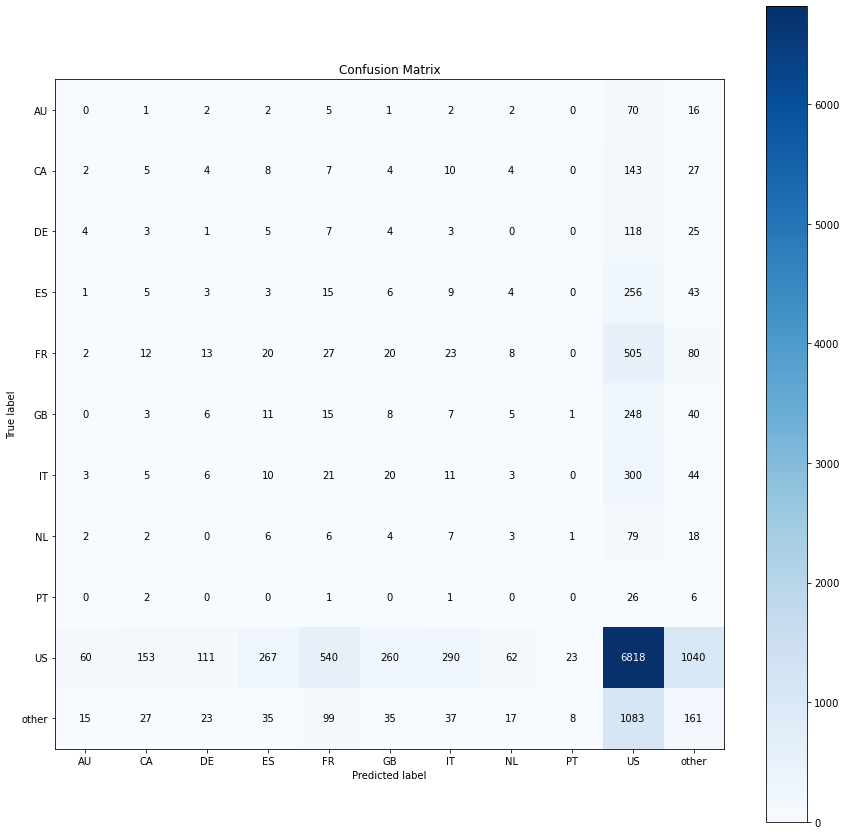

In [84]:
# accuracy
acc_random = m.accuracy_score(y_test_nn, yhat_random)
print('Accuracy: {}'.format(acc_random))

# balanced accuracy
balanced_acc_random = m.balanced_accuracy_score(y_test_nn, yhat_random)
print('Balanced Accuracy: {}'.format(balanced_acc_random))

# kappa metrics
kappa_random = m.cohen_kappa_score(y_test_nn, yhat_random)
print('kappa Score: {}'.format(kappa_random))

# classification report
print(m.classification_report(y_test_nn, yhat_random))

# confusion matrix
mt.plot_confusion_matrix(y_test_nn, yhat_random, normalize=False, figsize=(15, 15));


## 5.2 Neural Network-MLP

In [85]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [86]:
# model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))

# model compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 2s 989us/step - loss: 1.3343 - accuracy: 0.7051
Epoch 2/100
1705/1705 [==============================] - 2s 960us/step - loss: 1.2643 - accuracy: 0.7081
Epoch 3/100
1705/1705 [==============================] - 2s 934us/step - loss: 1.2260 - accuracy: 0.7086
Epoch 4/100
1705/1705 [==============================] - 2s 937us/step - loss: 1.2109 - accuracy: 0.7083
Epoch 5/100
1705/1705 [==============================] - 2s 937us/step - loss: 1.1929 - accuracy: 0.7086
Epoch 6/100
1705/1705 [==============================] - 2s 931us/step - loss: 1.1733 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 2s 986us/step - loss: 1.1576 - accuracy: 0.7087
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1528 - accuracy: 0.7086
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1432 - accuracy: 0.7088
Epoch 10/100
1705/1705 [==============================] - 2

1705/1705 [==============================] - 2s 1ms/step - loss: 1.0987 - accuracy: 0.7121
Epoch 80/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0983 - accuracy: 0.7120
Epoch 81/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.0986 - accuracy: 0.7119
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0981 - accuracy: 0.7121
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0983 - accuracy: 0.7119
Epoch 84/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0980 - accuracy: 0.7122
Epoch 85/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0978 - accuracy: 0.7124
Epoch 86/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0974 - accuracy: 0.7122
Epoch 87/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0975 - accuracy: 0.7121
Epoch 88/100
1705/1705 [==============================] - 2s 1ms/step - loss:

# 6.0 NN PERFORMANCE

In [87]:
# prediction
pred_nn = model.predict(x_test)

# invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

Accuracy: 0.7025302530253025
Balanced Accuracy: 0.09132626857931637
kappa Score: -2.5134637573920315e-05


/home/borges/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/borges/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/borges/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       0.12      0.01      0.01       170
          ES       0.00      0.00      0.00       345
          FR       0.14      0.00      0.00       710
          GB       0.00      0.00      0.00       344
          IT       0.00      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      0.99      0.83      9624
       other       0.10      0.00      0.01      1540

    accuracy                           0.70     13635
   macro avg       0.10      0.09      0.08     13635
weighted avg       0.52      0.70      0.58     13635



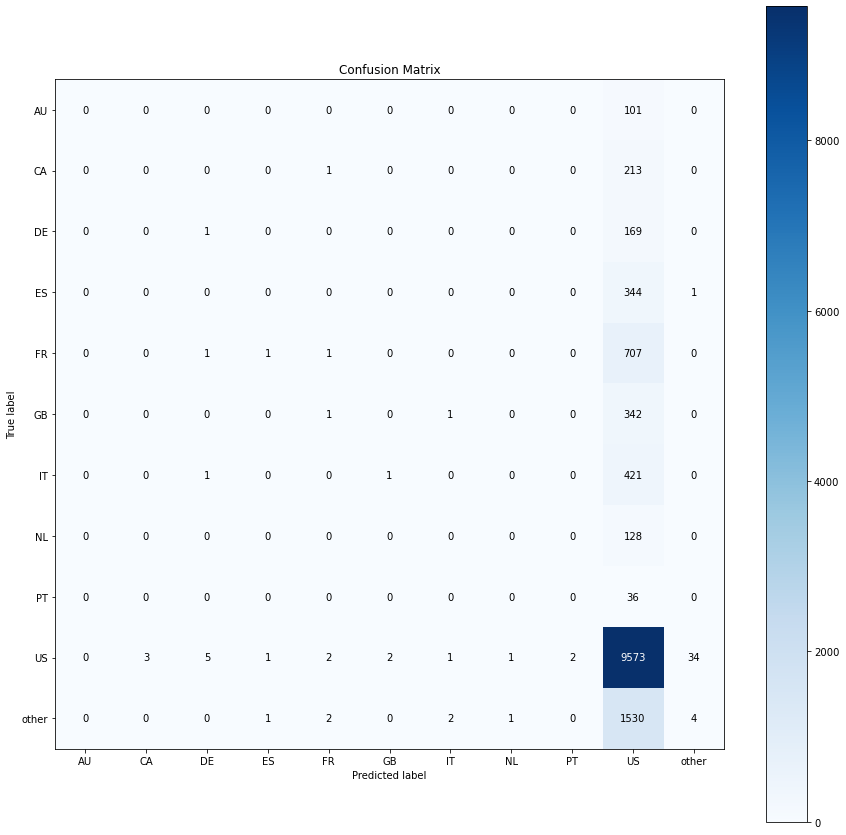

In [88]:
# accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

# balanced accuracy
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print('Balanced Accuracy: {}'.format(balanced_acc_nn))

# kappa metrics
kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print('kappa Score: {}'.format(kappa_nn))

# classification report
print(m.classification_report(y_test_nn, yhat_nn))

# confusion matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(15, 15));
